In [1]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.optimize import curve_fit
from timeit import default_timer as timer

In [2]:
# generate random positive vector
vector = np.zeros(2000)
for n in range(2000):
    v = random.expovariate(0.58)
    vector[n] = v
vector.shape

(2000,)

In [3]:
vector[0:5]

array([2.9145345 , 0.66384334, 0.90947988, 0.94168829, 0.03467934])

In [4]:
#defying a Constant function
def constant_function(vector):
    # f = lambda x: 4
    # map_object = map(f, vector)
    # return np.array(list(map_object))
    return 1

In [29]:
#defying a Sum function
def sum_of_elements(vector):
    sum = 0
    for o in vector:
        sum += o
    return sum

In [30]:
#defying a Product function
def product_of_elements(vector):
    prod = 1
    for p in vector:
        prod *= p
    return prod

In [7]:
#defying a poly function
def calc_polynomial(coefs, x=1.5):
    return np.polyval(coefs, x)

In [8]:
#defying a Horner function
def horner(coeff, x=1.5):

    # Initialize result
    result = coeff[0]

    n = len(coeff)
    # Evaluate value of polynomial
    # using Horner's method
    for i in range(1, n):

        result = result*x + coeff[i]

    return result

In [9]:
#defying a bubble sort function
def bubble_sort(arr):
    def swap(i, j):
        arr[i], arr[j] = arr[j], arr[i]

    n = len(arr)
    swapped = True

    x = -1
    while swapped:
        swapped = False
        x = x + 1
        for i in range(1, n-x):
            if arr[i - 1] > arr[i]:
                swap(i - 1, i)
                swapped = True

In [10]:
#defying a quick sort function
def partition(array, begin, end):
    pivot_idx = begin
    for i in range(begin+1, end+1):
        if array[i] <= array[begin]:
            pivot_idx += 1
            array[i], array[pivot_idx] = array[pivot_idx], array[i]
    array[pivot_idx], array[begin] = array[begin], array[pivot_idx]
    return pivot_idx

def quick_sort_recursion(array, begin, end):
    if begin >= end:
        return
    pivot_idx = partition(array, begin, end)
    quick_sort_recursion(array, begin, pivot_idx-1)
    quick_sort_recursion(array, pivot_idx+1, end)

def quick_sort(array, begin=0, end=None):
    if end is None:
        end = len(array) - 1

    return quick_sort_recursion(array, begin, end)

In [11]:
#defying a Matrix evaluating function
def matrix_evaluating(n):
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    return np.dot(A, B)

In [32]:
#Start script of measuring time
times_arr = []
for times in tqdm(range(10)):
    for n in range(1, 1700, 10):
        start = timer()
        constant_function(vector[:n])
        const_time = timer() - start
        start = timer()
        constant_function(vector[:n])
        const_time = timer() - start
        start = timer()
        sum_of_elements(vector[:n])
        sum_time = timer() - start
        start = timer()
        product_of_elements(vector[:n])
        product_time = timer() - start
        start = timer()
        calc_polynomial(vector[:n])
        poly_time = timer() - start
        start = timer()
        horner(vector[:n])
        horner_time = timer() - start
        start = timer()
        bubble_sort(vector[:n].copy())
        bubble_time = timer() - start
        start = timer()
        quick_sort(vector[:n].copy(), begin=0, end=None)
        quick_time = timer() - start
        start = timer()
        vector[:n].copy().sort()
        timsort_time = timer() - start
        start = timer()
        matrix_evaluating(n)
        matrix_time = timer() - start
        times_arr.append({'Constant_function': const_time, 'Sum_elements': sum_time, 'Product_elements': product_time, 'Classic_polynom': poly_time,
                      'Horner_polynom': horner_time, 'Bubble_sort': bubble_time, 'Quick_sort': quick_time, 'Tim_sort': timsort_time,
                      'Matrix_product': matrix_time, 'n': n})

100%|██████████| 10/10 [06:12<00:00, 37.27s/it]


In [33]:
# Create a df of results
df = pd.DataFrame(times_arr)
df

,Constant_function,Sum_elements,Product_elements,Classic_polynom,Horner_polynom,Bubble_sort,Quick_sort,Tim_sort,Matrix_product,n
0,5.000002e-07,0.000012,0.000004,0.000074,0.000004,0.000007,0.000005,0.000005,0.000027,1
1,6.000000e-07,0.000236,0.000006,0.000071,0.000009,0.000081,0.000036,0.000112,0.000049,11
2,4.999999e-07,0.000029,0.000006,0.000072,0.000010,0.000182,0.000091,0.000006,0.000080,21
3,5.000002e-07,0.000012,0.000010,0.000040,0.000017,0.000422,0.000225,0.000007,0.000368,31
4,3.000000e-07,0.000010,0.000006,0.000048,0.000032,0.000598,0.000217,0.000005,0.000123,41
...,...,...,...,...,...,...,...,...,...,...
1695,3.999999e-07,0.000148,0.000169,0.000443,0.000425,0.554300,0.008119,0.000102,0.094916,1651
1696,4.000003e-07,0.000152,0.000142,0.000464,0.000423,0.530688,0.007698,0.000068,0.075996,1661
1697,3.000000e-07,0.000152,0.000132,0.000438,0.000400,0.525148,0.007349,0.000061,0.076885,1671
1698,3.999999e-07,0.000271,0.000260,0.000607,0.000602,0.533804,0.007032,0.000059,0.079972,1681


In [34]:
graph = df.groupby(['n']).mean().reset_index()
graph

,n,Constant_function,Sum_elements,Product_elements,Classic_polynom,Horner_polynom,Bubble_sort,Quick_sort,Tim_sort,Matrix_product
0,1,6.000000e-07,0.000010,0.000003,0.000041,0.000002,0.000004,0.000005,0.000002,0.000017
1,11,3.400000e-07,0.000027,0.000004,0.000025,0.000004,0.000040,0.000031,0.000042,0.000083
2,21,3.700000e-07,0.000011,0.000004,0.000028,0.000008,0.000112,0.000061,0.000003,0.000107
3,31,3.600000e-07,0.000007,0.000007,0.000028,0.000009,0.000245,0.000088,0.000003,0.000100
4,41,3.300000e-07,0.000009,0.000008,0.000025,0.000013,0.000380,0.000113,0.000003,0.000052
...,...,...,...,...,...,...,...,...,...,...
165,1651,3.500000e-07,0.000147,0.000137,0.000461,0.000403,0.533830,0.007661,0.000068,0.081461
166,1661,3.500000e-07,0.000167,0.000149,0.000511,0.000441,0.530861,0.007130,0.000060,0.084778
167,1671,2.860000e-06,0.000174,0.000165,0.000485,0.000444,0.541060,0.007827,0.000061,0.084596
168,1681,3.500000e-07,0.000175,0.000161,0.000485,0.000439,0.552741,0.007570,0.000062,0.083792


In [48]:
##defying a theoretical function
def const_est(x, a):
    return np.ones_like(x) * a


def linear_est(x, a, b):
    return a*x + b


def nlogn_est(x, a, b):
    return a*x*np.log(x) + b


def quad_est(x, a, b):
    return a*x**2 + b


def cubic_est(x, a):
    return a * (x**3)

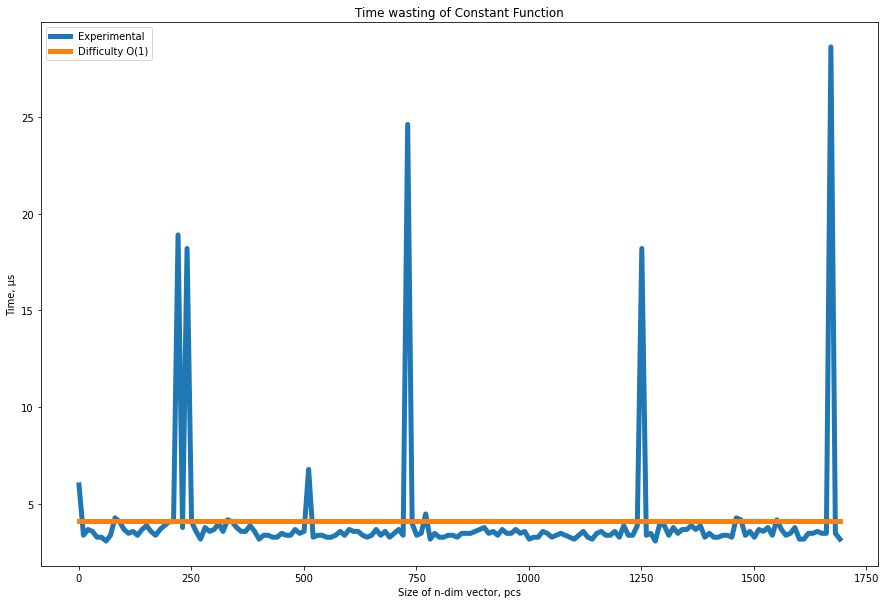

In [36]:
#Graphs plotting
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Constant_function*10e6, label="Experimental", linewidth="5")
popt, _ = curve_fit(const_est, graph.n, graph.Constant_function*10e6)
plt.plot(graph.n, const_est(graph.n, *popt), label="Difficulty O(1)",  linewidth="5")
plt.title('Time wasting of Constant Function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Cons.png', bbox_inches='tight')
plt.show()

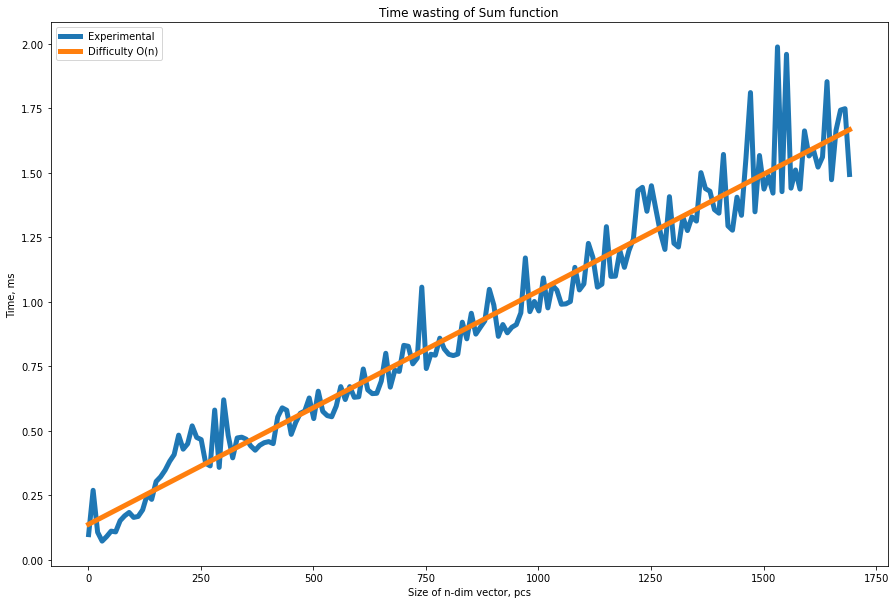

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Sum_elements*10e3,  label="Experimental", linewidth="5")
popt, _ = curve_fit(linear_est, graph.n, graph.Sum_elements*10e3)
plt.plot(graph.n, linear_est(graph.n, *popt), label="Difficulty O(n)", linewidth="5")
plt.title('Time wasting of Sum function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Sum', bbox_inches='tight')
plt.show()


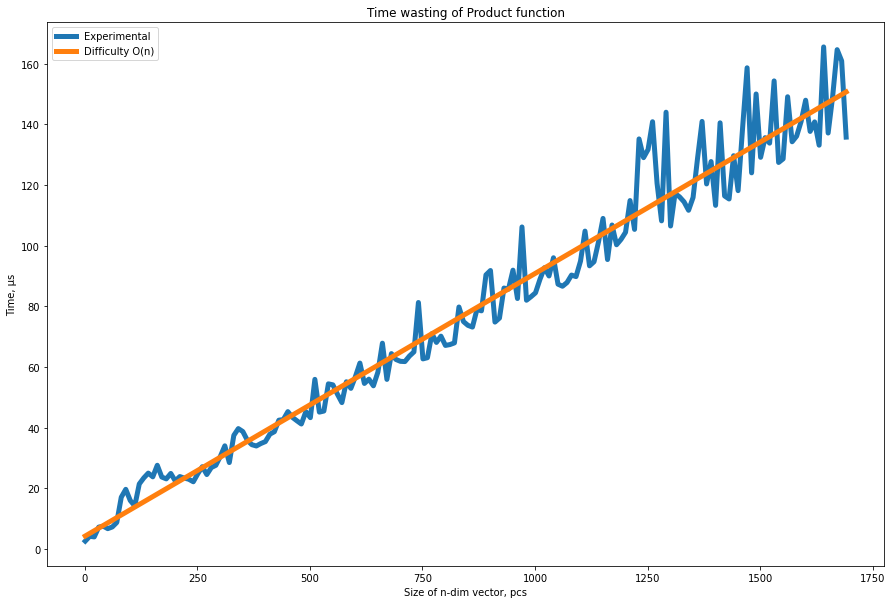

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Product_elements*1e6,  label="Experimental", linewidth="5")
popt, _ = curve_fit(linear_est, graph.n, graph.Product_elements*1e6)
plt.plot(graph.n, linear_est(graph.n, *popt), label="Difficulty O(n)", linewidth="5")
plt.title('Time wasting of Product function')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Prod', bbox_inches='tight')
plt.show()

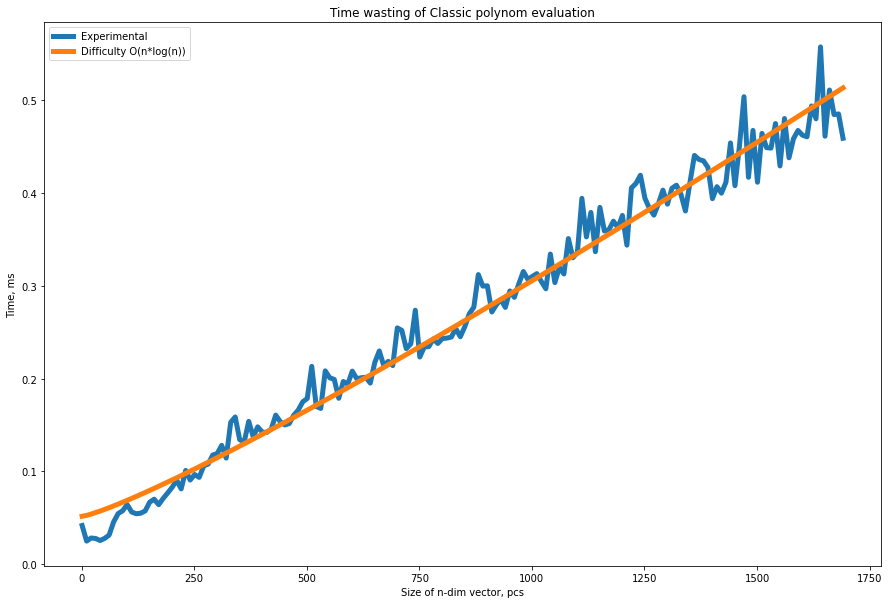

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Classic_polynom*1e3,  label="Experimental", linewidth="5")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Classic_polynom*1e3)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty O(n*log(n))", linewidth="5")
plt.title('Time wasting of Classic polynom evaluation')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Classic', bbox_inches='tight')
plt.show()

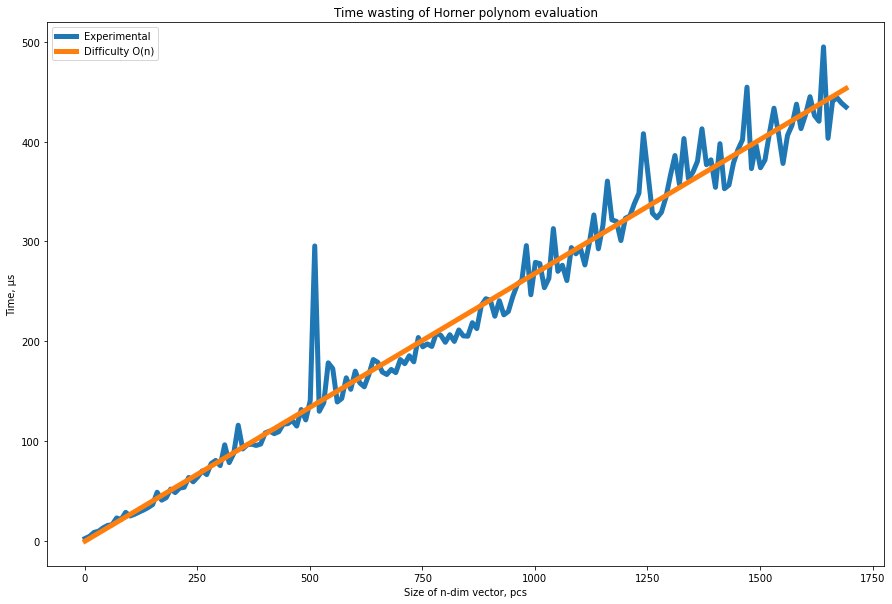

In [40]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Horner_polynom*1e6, label="Experimental", linewidth="5")
popt, _ = curve_fit(linear_est, graph.n, graph.Horner_polynom*1e6)
plt.plot(graph.n, linear_est(graph.n, *popt), label="Difficulty O(n)", linewidth="5")
plt.title('Time wasting of Horner polynom evaluation')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Horner', bbox_inches='tight')
plt.show()

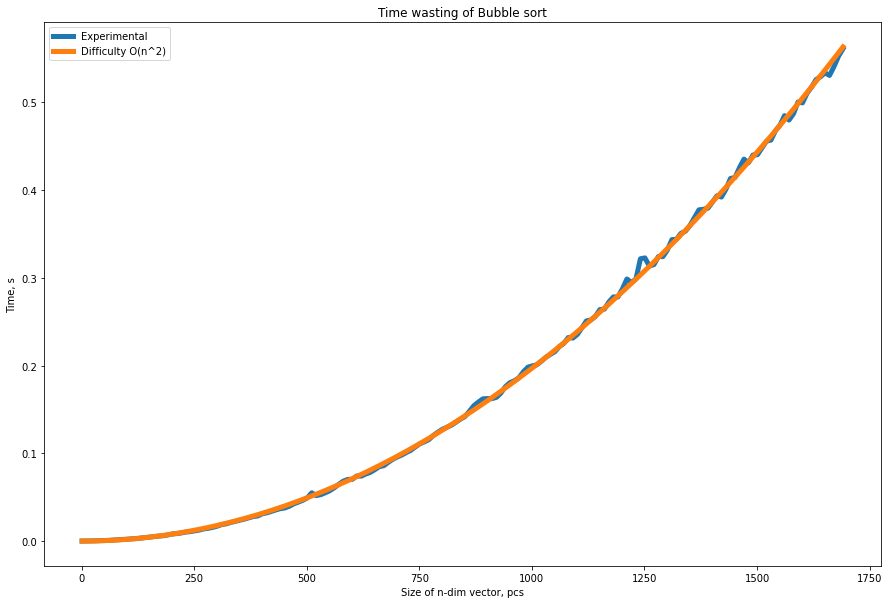

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Bubble_sort, label="Experimental", linewidth="5")
popt, _ = curve_fit(quad_est, graph.n, graph.Bubble_sort)
plt.plot(graph.n, quad_est(graph.n, *popt), label="Difficulty O(n^2)", linewidth="5")
plt.title('Time wasting of Bubble sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, s')
plt.legend()
plt.savefig('./Pictures/task1_bubble', bbox_inches='tight')
plt.show()

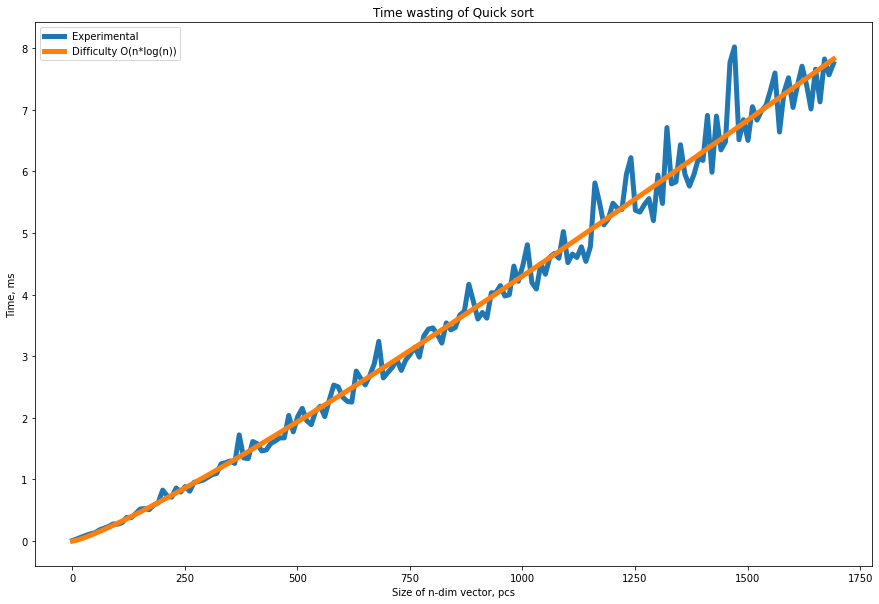

In [42]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Quick_sort*1e3, label="Experimental", linewidth="5")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Quick_sort*1e3)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty O(n*log(n))", linewidth="5")
plt.title('Time wasting of Quick sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_QuickSort', bbox_inches='tight')
plt.show()

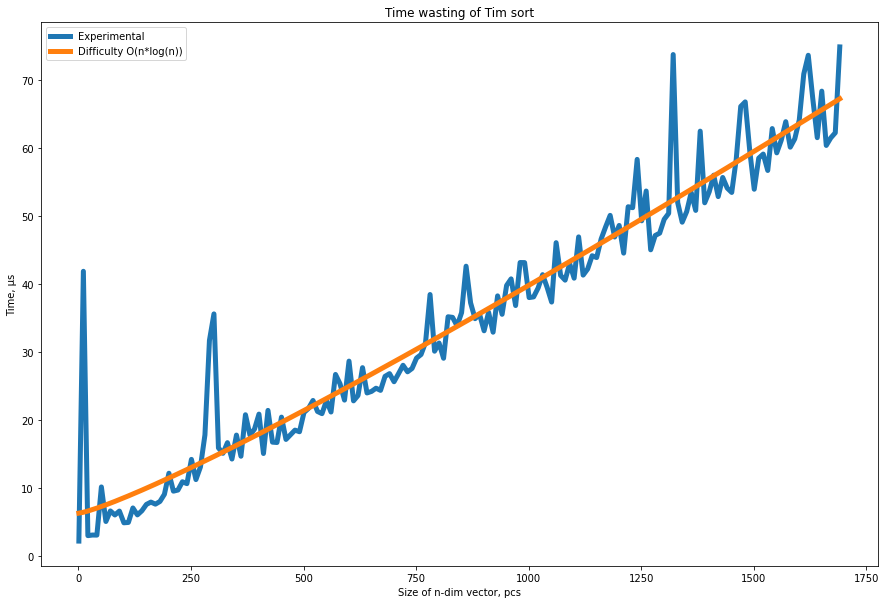

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Tim_sort*1e6, label="Experimental", linewidth="5")
popt, _ = curve_fit(nlogn_est, graph.n, graph.Tim_sort*1e6)
plt.plot(graph.n, nlogn_est(graph.n, *popt), label="Difficulty O(n*log(n))", linewidth="5")
plt.title('Time wasting of Tim sort')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, μs')
plt.legend()
plt.savefig('./Pictures/task1_Tims', bbox_inches='tight')
plt.show()

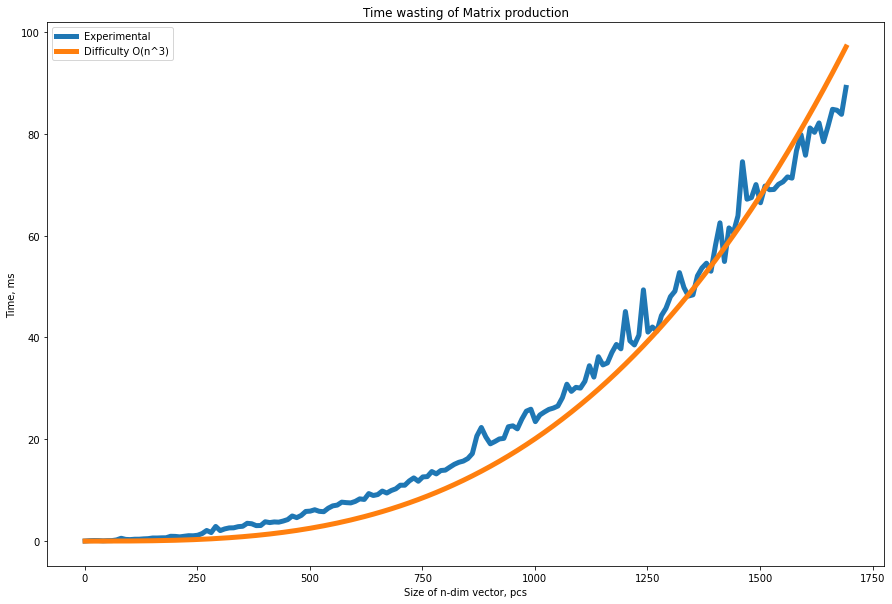

In [49]:
plt.figure(figsize=(15, 10))
plt.plot(graph.n, graph.Matrix_product*1e3, label="Experimental", linewidth="5")
popt, _ = curve_fit(cubic_est, graph.n, graph.Matrix_product*1e3)
plt.plot(graph.n, cubic_est(graph.n, *popt), label="Difficulty O(n^3)", linewidth="5")
plt.title('Time wasting of Matrix production')
plt.xlabel('Size of n-dim vector, pcs')
plt.ylabel('Time, ms')
plt.legend()
plt.savefig('./Pictures/task1_Matrix', bbox_inches='tight')
plt.show()

In [616]:
constant_function(vector[:n])

1

In [617]:
vector[:n]

array([0.24698209, 0.48691226, 0.13384345, ..., 3.1816278 , 0.74541388,
       0.88833453])